In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
mooc = pd.read_csv("Downloads/ICE4_Data.csv")
mooc

,certified,forum.posts,grade,assignment
0,no,7,3,9
1,no,7,4,1
2,yes,191,8,19
3,yes,130,10,18
4,yes,135,8,18
...,...,...,...,...
995,yes,88,10,13
996,yes,153,10,19
997,no,41,4,3
998,no,47,6,12


In [8]:
mooc['certified'].value_counts()

yes    725
no     275
Name: certified, dtype: int64

In [9]:
mooc.describe()

,forum.posts,grade,assignment
count,1000.000000,1000.00000,1000.000000
mean,113.107000,7.76500,13.693000
std,55.126477,2.38232,5.011973
min,1.000000,1.00000,1.000000
25%,72.750000,8.00000,12.000000
50%,118.500000,8.00000,15.000000
75%,160.000000,9.00000,17.000000
max,200.000000,10.00000,20.000000


In [10]:
import seaborn as sns

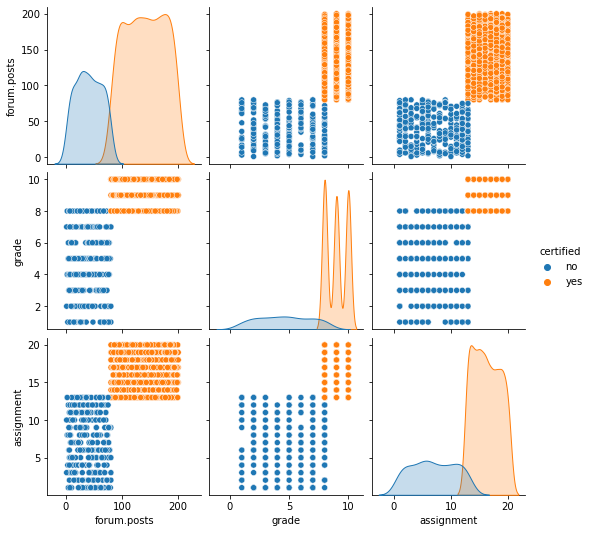

In [11]:
sns.pairplot(mooc, hue = "certified")

In [13]:
from sklearn.linear_model import LogisticRegression

In [18]:
dummy = pd.get_dummies(mooc['certified'] ,prefix = 'certified')
dummy

,certified_no,certified_yes
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
995,0,1
996,0,1
997,1,0
998,1,0


In [19]:
moocD = pd.concat([mooc, dummy], axis=1)
moocD = moocD.drop(['certified', 'certified_no'], axis=1)
moocD

,forum.posts,grade,assignment,certified_yes
0,7,3,9,0
1,7,4,1,0
2,191,8,19,1
3,130,10,18,1
4,135,8,18,1
...,...,...,...,...
995,88,10,13,1
996,153,10,19,1
997,41,4,3,0
998,47,6,12,0


In [20]:
Xs = moocD[["forum.posts", "grade", "assignment"]].to_numpy()
certified = moocD.loc[:,"certified_yes"].values.reshape(-1, 1)

In [21]:
moocLogitModel1 = LogisticRegression()
moocLogitModel1.fit(Xs, certified)

C:\Users\zzl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [22]:
moocLogitModel1.intercept_

array([-63.13291439])

In [23]:
moocLogitModel1.coef_

array([[0.62419697, 0.52270711, 0.85766257]])

In [24]:
import statsmodels.api as sm

moocLogitModel2 = sm.Logit(certified, Xs)
moocLogitModel2Fit = moocLogitModel2.fit()
print(moocLogitModel2Fit.summary())

Optimization terminated successfully.
         Current function value: 22.457768
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Tue, 19 Oct 2021   Pseudo R-squ.:                     inf
Time:                        21:45:42   Log-Likelihood:                -22458.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0378      0.003     10.852      0.000       0.031       0.045
x2            -0.3202      0

C:\Users\zzl\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\zzl\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\zzl\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3500: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [25]:
from sklearn.tree import DecisionTreeClassifier

Xs_tree = mooc.drop('certified', axis = 1)
certified = mooc['certified']

In [26]:
moocTreeModel = DecisionTreeClassifier()
moocTreeModel.fit(Xs_tree, certified)

DecisionTreeClassifier()

In [27]:
from sklearn import tree
text_representation = tree.export_text(moocTreeModel)
print(text_representation)

|--- feature_0 <= 79.50
|   |--- class: no
|--- feature_0 >  79.50
|   |--- feature_1 <= 7.50
|   |   |--- class: no
|   |--- feature_1 >  7.50
|   |   |--- class: yes



[Text(133.92000000000002, 181.2, 'forum.posts <= 79.5\ngini = 0.399\nsamples = 1000\nvalue = [275, 725]\nclass = no'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 271\nvalue = [271, 0]\nclass = no'),
 Text(200.88000000000002, 108.72, 'grade <= 7.5\ngini = 0.011\nsamples = 729\nvalue = [4, 725]\nclass = no'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = no'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 725\nvalue = [0, 725]\nclass = no')]

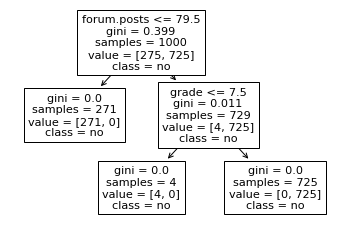

In [28]:
tree.plot_tree(moocTreeModel,
              feature_names = ["forum.posts", "grade", "assignment"], 
                class_names = mooc.certified 
              )

In [29]:
from sklearn.naive_bayes import GaussianNB

Xs_NB = mooc.drop('certified', axis = 1)
certified = mooc['certified']

In [30]:
moocNBModel = GaussianNB()
moocNBModel.fit(Xs_NB, certified)

GaussianNB()

In [31]:
certified_pred = moocNBModel.predict(Xs_NB)
performance = [item in certified_pred for item in certified]
print('The accuracy is', sum(performance)/len(performance)*100, '%')

The accuracy is 100.0 %


In [32]:
 from sklearn.model_selection import train_test_split

## For logistic regression
Xs_logit = moocD[["forum.posts", "grade", "assignment"]].to_numpy()
certified_logit = moocD.loc[:,"certified_yes"].values.reshape(-1, 1)
xs_logit_training, xs_logit_test, y_logit_training, y_logit_test = train_test_split(Xs_logit, certified_logit, test_size = 0.2)

## For decision tree and Naive Bayes
Xs_TNB = mooc.drop('certified', axis = 1)
certified_TNB = mooc['certified']
xs_TNB_training, xs_TNB_test, y_TNB_training, y_TNB_test = train_test_split(Xs_TNB, certified_TNB, test_size = 0.2)

In [40]:
moocLogitModel1 = LogisticRegression()
moocLogitModel1.fit(Xs_logit, certified_logit)

C:\Users\zzl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [41]:
moocLogitModel1.intercept_

array([-63.13291439])

In [42]:
moocLogitModel1.coef_

array([[0.62419697, 0.52270711, 0.85766257]])

In [43]:
import statsmodels.api as sm

In [44]:
moocLogitModel2 = sm.Logit(certified_logit,Xs_logit)
moocLogitModel2Fit = moocLogitModel2.fit()
print(moocLogitModel2Fit.summary())

Optimization terminated successfully.
         Current function value: 22.457768
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Thu, 21 Oct 2021   Pseudo R-squ.:                     inf
Time:                        22:20:27   Log-Likelihood:                -22458.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0378      0.003     10.852      0.000       0.031       0.045
x2            -0.3202      0

C:\Users\zzl\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\zzl\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\zzl\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3500: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
Xs_logit_tree = mooc.drop('certified', axis = 1)
certified_logit= mooc['certified']

In [47]:
moocTreeModel = DecisionTreeClassifier()
moocTreeModel.fit(Xs_logit_tree, certified_logit)

DecisionTreeClassifier()

In [48]:
from sklearn import tree
text_representation = tree.export_text(moocTreeModel)
print(text_representation)

|--- feature_0 <= 79.50
|   |--- class: no
|--- feature_0 >  79.50
|   |--- feature_2 <= 11.00
|   |   |--- class: no
|   |--- feature_2 >  11.00
|   |   |--- class: yes



In [49]:
from sklearn.naive_bayes import GaussianNB

Xs_logit_NB = mooc.drop('certified', axis = 1)
certified_logit = mooc['certified']

In [50]:
moocNBModel = GaussianNB()
moocNBModel.fit(Xs_logit_NB, certified_logit)

GaussianNB()

In [51]:
certified_pred = moocNBModel.predict(Xs_logit_NB)
performance = [item in certified_pred for item in certified]
print('The accuracy is', sum(performance)/len(performance)*100, '%')

The accuracy is 100.0 %


In [52]:
certified_pred_logit1 = moocLogitModel1.predict(xs_logit_test)

In [56]:
certified_pred_logit2 = moocLogitModel1.predict(xs_logit_test2)

NameError: name 'xs_logit_test2' is not defined

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
print(confusion_matrix(y_logit_test, certified_pred_logit1))

[[ 45   0]
 [  0 155]]


In [55]:
print(confusion_matrix(y_logit_test, certified_pred_logit2))

NameError: name 'certified_pred_logit2' is not defined